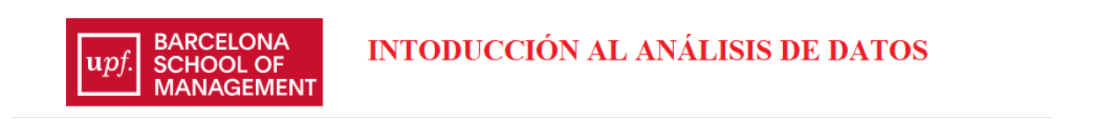

## <span style="color:red">RATIO DE SHARPE- Trimestral </span>

La expresión matemática es:

Ratio de Sharpe =$ \frac{R_p-R_f}{\sigma_p}$

Donde:

$R_p$  es el rendimiento promedio de la inversión o cartera.

$R_f$  es la tasa de retorno libre de riesgo, generalmente se toma como la tasa de interés de los bonos del gobierno a corto plazo y con un horizonte de tiempo igual al horizonte del ratio

Exceso de rendimiento:$R_p-R_f$. El rendimiento mínimo que se espera en una inversion es $R_f$ entonces el exceso es lo que estoy dispuesto a ganar por cierta volatilidad. 

$\sigma_p$ es la desviación estándar(volatilidad) de los retornos de la inversión o cartera.

Este índice mide el **exceso de rendimiento** de la inversión por **unidad de riesgo** asumiendo que los retornos se distribuyen normalmente. Cuanto mayor sea el índice de Sharpe, mejor será el rendimiento ajustado al riesgo de la inversión.

Si se desea expresar el índice de Sharpe en términos anuales, debes ajustar los valores de a un horizonte temporal anual 

In [3]:
import pandas as pd  
import datetime  
import yfinance as yf

#( T-Bill) a 13 semanas. La rentabilidad esta anualizada y registrada en porcentaje
symbol=['AMZN']
stocks = yf.download(symbol, '2021-01-01','2023-01-01')
stoc_ad= stocks[['Adj Close']]
stoc_ad


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2021-01-04,159.331497
2021-01-05,160.925507
2021-01-06,156.919006
2021-01-07,158.108002
2021-01-08,159.134995
...,...
2022-12-23,85.250000
2022-12-27,83.040001
2022-12-28,81.820000


In [4]:
# rendimientos trimestrales del activo

stoc_tri =stoc_ad.resample('Q').apply(lambda x: (x.pct_change()+1).product()-1)

#valor rentabilidad trimestral promedio del activo.
###Este valor es importante porque es preciso y coincide con el vencimiento del libre de riesgo 

rpa=(stoc_tri+1).product()**(1/len(stoc_tri))-1

#volatilidad trimestral del stock.
###Este valor es importante porque es preciso y coincide con el vencimiento del libre de riesgo
vol=stoc_tri.std()

#excesos de rentabilidad trimestral
excess=rpa-0.0017

#ratio de Sharpe Trimestral
ratio_sharpe=excess/vol

print(f'El Ratio de Sharpe trimestral para el stock {symbol} es: {ratio_sharpe}')


El Ratio de Sharpe trimestral para el stock ['AMZN'] es: Adj Close   -0.584535
dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26216\3136677973.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  stoc_tri =stoc_ad.resample('Q').apply(lambda x: (x.pct_change()+1).product()-1)


**Conclusión**

Un ratio de Sharpe negativo indica un retorno inferior al libre de riesgo. Sugiere que el inversor habria obtenido mejor rentabilidad al invertir en el activo libre de riesgo.
 

Generalmente, se pueden utilizar las siguientes referencias:

+ < 1: Indica que el rendimiento no es suficiente en comparación con el riesgo asumido.
+ 1 - 2: Considerado un buen rendimiento ajustado por riesgo.
* .> 2: Excelente rendimiento ajustado por riesgo.

Por lo tanto, un ratio de Sharpe de -0,58 indica un mal desempeño en relación con el riesgo asumido y señala que la inversión no está compensando adecuadamente el riesgo. 

### Ejercicio

Calcular el ratio de Sharpe para AMZ a nivel anual en el periodo: '2021-01-01','2023-01-01'

sugerencia: utilizar el libre de riesgo anual calculado a partir del trimestral en esta ventana de tiempo. Cuadreno 4.3 libre de riesgo.